Download Data

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#import library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [ ]:
#load attribute
df_attribute = pd.read_csv("/content/drive/MyDrive/Dataset/list_attribute.txt", sep="\s+", header = 1)


In [ ]:
df_attribute.shape

(202599, 40)

In [ ]:
df_attribute.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202599 entries, 000001.jpg to 202599.jpg
Data columns (total 40 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   5_o_Clock_Shadow     202599 non-null  int64
 1   Arched_Eyebrows      202599 non-null  int64
 2   Attractive           202599 non-null  int64
 3   Bags_Under_Eyes      202599 non-null  int64
 4   Bald                 202599 non-null  int64
 5   Bangs                202599 non-null  int64
 6   Big_Lips             202599 non-null  int64
 7   Big_Nose             202599 non-null  int64
 8   Black_Hair           202599 non-null  int64
 9   Blond_Hair           202599 non-null  int64
 10  Blurry               202599 non-null  int64
 11  Brown_Hair           202599 non-null  int64
 12  Bushy_Eyebrows       202599 non-null  int64
 13  Chubby               202599 non-null  int64
 14  Double_Chin          202599 non-null  int64
 15  Eyeglasses           202599 non-null  int64

In [ ]:
df_attribute.head()

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [ ]:
df_attribute = df_attribute.reset_index()
df_attribute.rename(columns={'index': 'Image_Filenames'}, inplace=True)

In [ ]:
df_attribute.head()

,Image_Filenames,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [ ]:
df_label = df_attribute[['Image_Filenames','Male']]

In [ ]:
df_label.rename(columns={'Male': 'Gender'}, inplace=True)

<ipython-input-11-4e513fea588d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_label.rename(columns={'Male': 'Gender'}, inplace=True)


In [ ]:
df_label.shape

(202599, 2)

In [ ]:
df_label.duplicated().sum()

0

In [ ]:
df_label.isnull().sum()

,0
Image_Filenames,0
Gender,0


In [ ]:
df_label.isna().sum()

,0
Image_Filenames,0
Gender,0


In [ ]:
df_label['Gender'].value_counts()

,count
Gender,
-1,118165
1,84434


In [ ]:
df_label['Gender'].replace([-1,1],['Female','Male'],inplace=True)

<ipython-input-17-1bdfa1b3a8ed>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_label['Gender'].replace([-1,1],['Female','Male'],inplace=True)
<ipython-input-17-1bdfa1b3a8ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_label['Gender'].replace([-1,1],['Female','Male'],inplace=True)


In [ ]:
df_label.head()

,Image_Filenames,Gender
0,000001.jpg,Female
1,000002.jpg,Female
2,000003.jpg,Male
3,000004.jpg,Female
4,000005.jpg,Female


In [ ]:
#check duplicate filename by keyword (1), (2), dst
df_label['Ori_Name'] = df_label['Image_Filenames'].str.replace(r'\s*\(\d+\)', '', regex=True)

<ipython-input-19-e9423339367d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_label['Ori_Name'] = df_label['Image_Filenames'].str.replace(r'\s*\(\d+\)', '', regex=True)


In [ ]:
df_label.head()

,Image_Filenames,Gender,Ori_Name
0,000001.jpg,Female,000001.jpg
1,000002.jpg,Female,000002.jpg
2,000003.jpg,Male,000003.jpg
3,000004.jpg,Female,000004.jpg
4,000005.jpg,Female,000005.jpg


In [ ]:
df_label['Ori_Name'].duplicated().sum()

0

In [ ]:
duplicates = df_label[df_label.duplicated('Ori_Name', keep=False)]

print(duplicates)

Empty DataFrame
Columns: [Image_Filenames, Gender, Ori_Name]
Index: []


In [ ]:
#import library for loading image dan processing

import cv2
import os

In [ ]:
image_dir = '/content/drive/MyDrive/Dataset/Images/'

In [ ]:
#Create Filename list based on Data provided by Indonesia AI

image_filenames = []

for filename in os.listdir(image_dir):
    if filename.endswith(('.png', '.jpg', '.jpeg')):
        image_filenames.append(filename)



In [ ]:
image_filenames[:5]

['188010.jpg', '047418.jpg', '119682.jpg', '153310.jpg', '162413.jpg']

In [ ]:
image_filenames = sorted(image_filenames)

In [ ]:
image_filenames[:5]

['000051.jpg', '000052.jpg', '000065.jpg', '000166.jpg', '000198.jpg']

In [ ]:
#create dataframe based on imgae_filenames list
df_name = pd.DataFrame(image_filenames, columns=['Image_Filenames'])

In [ ]:
len(df_name)

5017

In [ ]:
#Check duplicate name, creating new column, replace value (1), dst to original name
df_name['Name_Ori'] = df_name['Image_Filenames'].str.replace(r'\s*\(\d+\)', '', regex=True)

In [ ]:
df_name['Name_Ori'].duplicated().sum()

17

In [ ]:
duplicates = df_name[df_name.duplicated('Name_Ori', keep=False)]

print(duplicates)

     Image_Filenames    Name_Ori
4510   182793(1).jpg  182793.jpg
4511      182793.jpg  182793.jpg
4512   182809(1).jpg  182809.jpg
4513      182809.jpg  182809.jpg
4514   182912(1).jpg  182912.jpg
4515      182912.jpg  182912.jpg
4516   182943(1).jpg  182943.jpg
4517      182943.jpg  182943.jpg
4518   183005(1).jpg  183005.jpg
4519      183005.jpg  183005.jpg
4520   183018(1).jpg  183018.jpg
4521      183018.jpg  183018.jpg
4522   183050(1).jpg  183050.jpg
4523      183050.jpg  183050.jpg
4524   183111(1).jpg  183111.jpg
4525      183111.jpg  183111.jpg
4526   183121(1).jpg  183121.jpg
4527      183121.jpg  183121.jpg
4528   183145(1).jpg  183145.jpg
4529      183145.jpg  183145.jpg
4681   189132(1).jpg  189132.jpg
4682      189132.jpg  189132.jpg
4683   189297(1).jpg  189297.jpg
4684      189297.jpg  189297.jpg
4685   189324(1).jpg  189324.jpg
4686      189324.jpg  189324.jpg
4688   189512(1).jpg  189512.jpg
4689      189512.jpg  189512.jpg
4690   189513(1).jpg  189513.jpg
4691      

In [ ]:
#Keep 1 for each duplicate data
df_name = df_name.drop_duplicates(subset='Name_Ori', keep='last')

In [ ]:
#Recheck duplicate
duplicates = df_name[df_name.duplicated('Name_Ori', keep=False)]

print(duplicates)

Empty DataFrame
Columns: [Image_Filenames, Name_Ori]
Index: []


In [ ]:
df_name['Name_Ori'].duplicated().sum()

0

In [ ]:
len(df_name)

5000

In [ ]:
df_name.head()

,Image_Filenames,Name_Ori
0,000051.jpg,000051.jpg
1,000052.jpg,000052.jpg
2,000065.jpg,000065.jpg
3,000166.jpg,000166.jpg
4,000198.jpg,000198.jpg


In [ ]:
#Filter Data based on Image_Filenames
i1 = df_label.set_index('Image_Filenames').index
i2 = df_name.set_index('Image_Filenames').index
df_label = df_label[i1.isin(i2)]
#df_name = df_name[~i2.isin(i1)]

In [ ]:
len(df_label)

5000

In [ ]:
df_label.drop('Ori_Name', axis=1, inplace = True)

In [ ]:
df_label.head(30)

,Image_Filenames,Gender
50,000051.jpg,Male
51,000052.jpg,Male
64,000065.jpg,Male
165,000166.jpg,Male
197,000198.jpg,Female
200,000201.jpg,Female
239,000240.jpg,Female
281,000282.jpg,Male
351,000352.jpg,Male
408,000409.jpg,Male


In [ ]:
df_label['Gender'].value_counts()

,count
Gender,
Female,2953
Male,2047


In [ ]:
#load image
images = []

# Load all images from the directory
#for filename in os.listdir(image_dir):
#for filename in image_filenames:
for filename in df_label.Image_Filenames:
    if filename.endswith(('.png', '.jpg', '.jpeg')):
        img_path = os.path.join(image_dir, filename)
        #img = cv2.imread(img_path)
        #img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        if os.path.exists(img_path):
          img = cv2.imread(img_path)
          if img is not None:
              images.append(img)




In [ ]:
#count image
len(images)

5000

array([[[191, 185, 178],
        [195, 189, 182],
        [162, 156, 149],
        ...,
        [231, 220, 216],
        [233, 224, 220],
        [233, 224, 220]],

       [[190, 184, 177],
        [195, 189, 182],
        [166, 160, 153],
        ...,
        [230, 219, 215],
        [233, 224, 220],
        [233, 224, 220]],

       [[190, 184, 177],
        [195, 189, 182],
        [174, 168, 161],
        ...,
        [229, 218, 214],
        [232, 223, 219],
        [232, 223, 219]],

       ...,

       [[ 23,  14,  11],
        [ 23,  14,  11],
        [ 23,  14,  11],
        ...,
        [ 16,   7,   4],
        [ 17,   8,   5],
        [ 17,   8,   5]],

       [[ 21,  12,   9],
        [ 21,  12,   9],
        [ 21,  12,   9],
        ...,
        [ 18,  11,   8],
        [ 17,   8,   5],
        [ 17,   8,   5]],

       [[ 21,  12,   9],
        [ 21,  12,   9],
        [ 21,  12,   9],
        ...,
        [ 18,  11,   8],
        [ 17,   8,   5],
        [ 17,   8,   5]]], dtype=uint8)
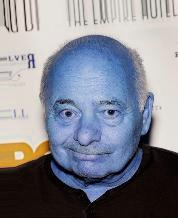

In [ ]:
images[0]

In [ ]:
images[:5]

[array([[[191, 185, 178],
         [195, 189, 182],
         [162, 156, 149],
         ...,
         [231, 220, 216],
         [233, 224, 220],
         [233, 224, 220]],
 
        [[190, 184, 177],
         [195, 189, 182],
         [166, 160, 153],
         ...,
         [230, 219, 215],
         [233, 224, 220],
         [233, 224, 220]],
 
        [[190, 184, 177],
         [195, 189, 182],
         [174, 168, 161],
         ...,
         [229, 218, 214],
         [232, 223, 219],
         [232, 223, 219]],
 
        ...,
 
        [[ 23,  14,  11],
         [ 23,  14,  11],
         [ 23,  14,  11],
         ...,
         [ 16,   7,   4],
         [ 17,   8,   5],
         [ 17,   8,   5]],
 
        [[ 21,  12,   9],
         [ 21,  12,   9],
         [ 21,  12,   9],
         ...,
         [ 18,  11,   8],
         [ 17,   8,   5],
         [ 17,   8,   5]],
 
        [[ 21,  12,   9],
         [ 21,  12,   9],
         [ 21,  12,   9],
         ...,
         [ 18,  11,   8],
  

In [ ]:
from PIL import Image

In [ ]:
first_five_images = [Image.fromarray(img) for img in images[:5]]

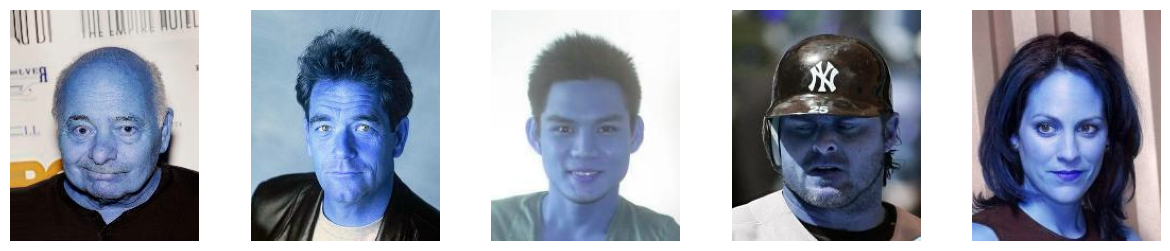

In [ ]:
# Plot images using matplotlib
fig, axes = plt.subplots(1, 5, figsize=(15, 3))  # Adjust figsize as needed

for ax, img in zip(axes, first_five_images):
    ax.imshow(img)
    ax.axis('off')  # Hide the axis

plt.show()

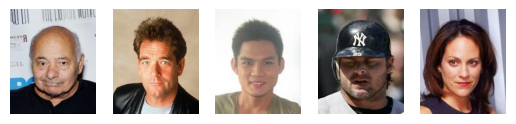

In [ ]:
#fig, axes = plt.subplots(1, 5, figsize=(15, 3))  # Adjust figsize as needed

for i, img in enumerate(images[:5]):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    plt.subplot(1, 5, i + 1)
    plt.imshow(img_rgb)
    plt.axis('off')

plt.show()

In [ ]:
#check image size
for img in images:
  print(img.shape)

(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 

In [ ]:
df_label['Image'] = images

In [ ]:
df_label.head(10)

,Image_Filenames,Gender,Image
50,000051.jpg,Male,"[[[191, 185, 178], [195, 189, 182], [162, 156,..."
51,000052.jpg,Male,"[[[156, 185, 200], [156, 185, 200], [157, 186,..."
64,000065.jpg,Male,"[[[240, 245, 244], [240, 245, 244], [240, 245,..."
165,000166.jpg,Male,"[[[122, 126, 114], [121, 125, 113], [121, 125,..."
197,000198.jpg,Female,"[[[154, 131, 129], [156, 133, 131], [157, 134,..."
200,000201.jpg,Female,"[[[14, 8, 3], [13, 7, 2], [10, 5, 2], [11, 6, ..."
239,000240.jpg,Female,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
281,000282.jpg,Male,"[[[2, 1, 3], [2, 1, 3], [2, 1, 3], [2, 1, 3], ..."
351,000352.jpg,Male,"[[[235, 253, 254], [233, 251, 252], [230, 247,..."
408,000409.jpg,Male,"[[[0, 4, 11], [4, 7, 15], [0, 3, 8], [0, 0, 4]..."


In [ ]:
#Classify image to train and test data set, each folder has Male and Female folders

df_train, df_test = train_test_split(df_label, test_size=0.4, random_state=42)

In [ ]:
df_train.shape

(3000, 3)

In [ ]:
df_test.shape

(2000, 3)

In [ ]:
df_test.head()

,Image_Filenames,Gender,Image
60964,060965.jpg,Male,"[[[139, 80, 10], [140, 81, 11], [140, 81, 11],..."
103729,103730.jpg,Male,"[[[159, 180, 195], [166, 187, 202], [166, 187,..."
107305,107306.jpg,Male,"[[[222, 217, 219], [217, 214, 216], [222, 219,..."
42409,042410.jpg,Male,"[[[17, 18, 16], [14, 15, 13], [12, 13, 11], [1..."
28519,028520.jpg,Male,"[[[244, 201, 150], [248, 205, 154], [253, 210,..."


In [ ]:
#Create directory

dest_folder = "/content/drive/MyDrive/gender_classification"
os.makedirs(dest_folder, exist_ok=True)

In [ ]:
os.makedirs(os.path.join(dest_folder,'train'), exist_ok=True)
os.makedirs(os.path.join(dest_folder,'test'), exist_ok=True)
os.makedirs(os.path.join(dest_folder,'train','Male'), exist_ok=True)
os.makedirs(os.path.join(dest_folder,'train','Female'), exist_ok=True)
os.makedirs(os.path.join(dest_folder,'test', 'Male'), exist_ok=True)
os.makedirs(os.path.join(dest_folder,'test', 'Female'), exist_ok=True)

In [ ]:
#Copy image
import shutil

def copy_images(df, dest_subfolder):
  for _, row in df.iterrows():
        frm = os.path.join(image_dir, row['Image_Filenames'])
        dest = os.path.join(dest_folder, dest_subfolder, row['Gender'], row['Image_Filenames'])
        shutil.copy(frm, dest)

In [ ]:
copy_images(df_train, 'train')


In [ ]:
copy_images(df_test, 'test')

VGG16 MODEL

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

In [4]:
#Create datagen

train_datagen = ImageDataGenerator(
      rescale=1./255,  # Normalize pixel values to [0, 1]
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
   )


In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
# Load train images
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/gender_classification/train/',
    target_size=(218, 178),  # Resize images to match VGG input
    batch_size=64,
    class_mode='binary'  # Use 'binary' for binary classification
)




Found 3000 images belonging to 2 classes.


In [7]:
print(train_generator.class_indices)

{'Female': 0, 'Male': 1}


In [8]:
# Load test images
test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/gender_classification/test/',
    target_size=(218, 178),
    batch_size=64,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [9]:
print(test_generator.class_indices)

{'Female': 0, 'Male': 1}


In [10]:
#Base VGG Model
base_model = VGG16(weights='imagenet', include_top=True, input_shape=(224, 224,3))

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


In [11]:
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# VGG model
model = VGG16(weights='imagenet', include_top=False, input_shape=(218, 178,3))

In [13]:
#freeze training model
model.trainable = False

In [14]:
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 218, 178, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 218, 178, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 218, 178, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 109, 89, 64)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 109, 89, 128)        │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 109, 89, 128)        │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 54, 44, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 54, 44, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 54, 44, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 54, 44, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 27, 22, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 27, 22, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 27, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 27, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 13, 11, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 13, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 13, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 13, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 6, 5, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [15]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense

In [16]:
# Add Layer to top model
flatten_layer = Flatten()
dense_layer1 = Dense(8, activation='relu')
dense_layer2 = Dense(8, activation='relu')
output_layer = Dense(1, activation='sigmoid')

# Create a new model with the added layers
#new_model = Model(inputs=model.input, outputs=x)
new_model = models.Sequential([
    model,
    flatten_layer,
    dense_layer1,
    dense_layer2,
    output_layer
])

In [25]:
x = Flatten()(model.output)
x = Dense(8, activation='relu')(x)
x = Dense(8, activation='relu')(x)
x = Dense(1, activation= 'sigmoid')(x)

new_model = Model(inputs=model.input, outputs=x)

In [26]:
new_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 218, 178, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 218, 178, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 218, 178, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 109, 89, 64)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 109, 89, 128)        │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 109, 89, 128)        │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 54, 44, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 54, 44, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 54, 44, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 54, 44, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 27, 22, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 27, 22, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 27, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 27, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 13, 11, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 13, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 13, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 13, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 6, 5, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 15360)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 8)                   │         122,888 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 14,837,657 (56.60 MB)

 Trainable params: 14,837,657 (56.60 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [28]:
# Compile new model
new_model.compile(optimizer= Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#Train model
history = new_model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20,
    validation_data=test_generator,
    validation_steps=len(test_generator),
    callbacks=[early_stopping]
)

Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 6171s 131s/step - accuracy: 0.5152 - loss: 0.7437 - val_accuracy: 0.5890 - val_loss: 0.6883
Epoch 2/20


AttributeError: 'NoneType' object has no attribute 'items'

In [ ]:
val_loss, val_accuracy = new_model.evaluate(train_generator)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')

94/94 [==============================] - 56s 590ms/step - loss: 0.6714 - accuracy: 0.5957
Validation Loss: 0.6713509559631348
Validation Accuracy: 0.5956666469573975


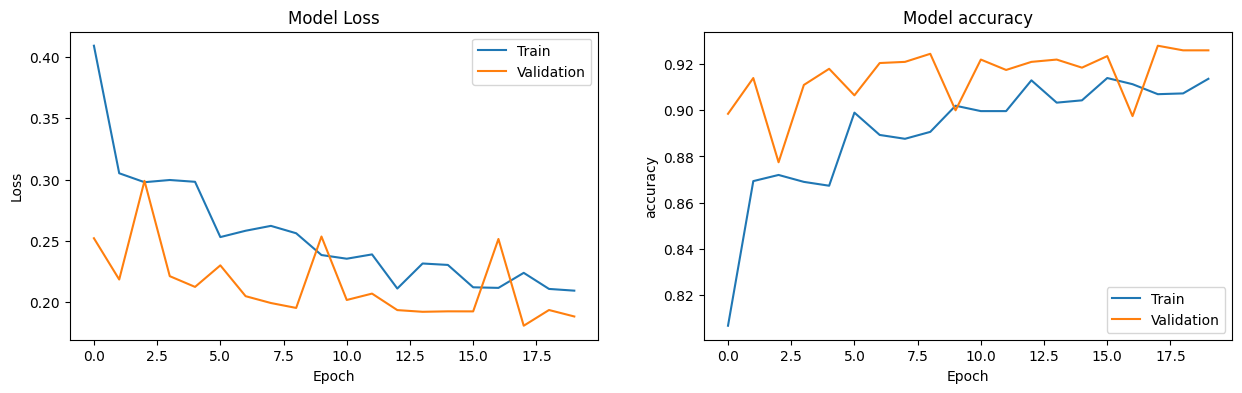

In [ ]:
#plot loss
plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

#plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()


In [ ]:
#Classification report for testing data
testing_prediction = new_model.predict(test_generator)
testing_prediction_class = (testing_prediction > 0.5).astype(int)

#true class
testing_class = test_generator.classes

#Evaluation metrics

print("Classification Report:\n", classification_report(testing_class, testing_prediction_class))
print("ROC AUC Score:", roc_auc_score(testing_class, testing_prediction))
print("Accuracy Score:", accuracy_score(testing_class, testing_prediction_class))
print("Average Precision Score: ", average_precision_score(testing_class, testing_prediction))

63/63 [==============================] - 30s 479ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.62      0.61      1178
           1       0.44      0.43      0.43       822

    accuracy                           0.54      2000
   macro avg       0.52      0.52      0.52      2000
weighted avg       0.54      0.54      0.54      2000

ROC AUC Score: 0.5168333477914234
Accuracy Score: 0.54
Average Precision Score:  0.4202393170696268


In [ ]:
#show confusion matrix
from sklearn.metrics import confusion_matrix

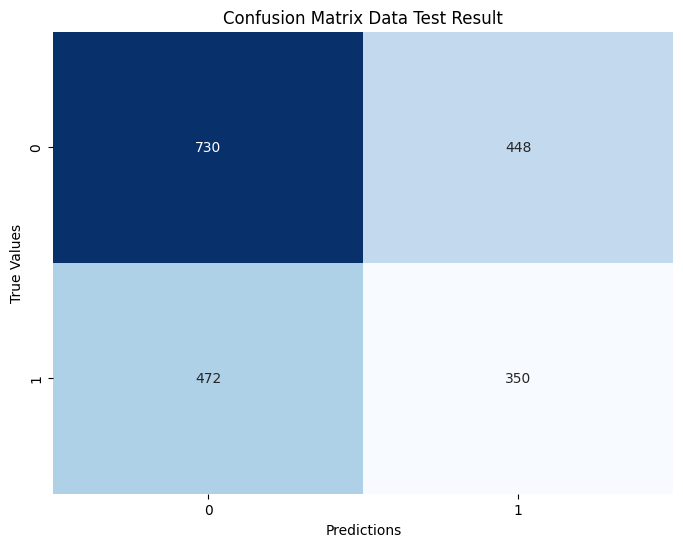

In [ ]:
#Confusion matrix
conf_matrix = confusion_matrix(testing_class, testing_prediction_class)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)

# Ajouter des labels et un titre
plt.title("Confusion Matrix Data Test Result")
plt.xlabel("Predictions")
plt.ylabel("True Values")
plt.show()

RESNET MODEL

In [ ]:
#import resnet model library
from tensorflow.keras.applications import ResNet50

In [ ]:
# Base ResNet50 model
base_model_restnet = ResNet50(weights='imagenet', include_top=True, input_shape=(224, 224, 3))

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
base_model_restnet.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
# ResNet50 model
model_restnet = ResNet50(weights='imagenet', include_top=False, input_shape=(218, 178,3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
#freeze training model
model_restnet.trainable = False

In [ ]:
model_restnet.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 218, 178, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 224, 184, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 109, 89, 64)    │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 109, 89, 64)    │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 109, 89, 64)    │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 111, 91, 64)    │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 55, 45, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 55, 45, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 55, 45, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 55, 45, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 55, 45, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 55, 45, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 55, 45, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 55, 45, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 55, 45, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
# Restnet new model
new_model_resnet = models.Sequential([
    model_restnet,
    flatten_layer,
    dense_layer1,
    dense_layer2,
    output_layer
])


In [ ]:
new_model_resnet.summary()

In [ ]:
# Compile resnet new model
new_model_resnet.compile(optimizer= Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#Train model
history = new_model_resnet.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20,
    validation_data=test_generator,
    validation_steps=len(test_generator),
    callbacks=[early_stopping]
)

In [ ]:
#Evaluate model
val_loss, val_accuracy = new_model_resnet.evaluate(train_generator)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')

In [ ]:
#plot loss
plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

#plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()


In [ ]:
#Classification report for testing data
testing_prediction = new_model_resnet.predict(test_generator)
testing_prediction_class = (testing_prediction > 0.5).astype(int)

#true class
testing_class = test_generator.classes

#Evaluation metrics

print("Classification Report:\n", classification_report(testing_class, testing_prediction_class))
print("ROC AUC Score:", roc_auc_score(testing_class, testing_prediction))
print("Accuracy Score:", accuracy_score(testing_class, testing_prediction_class))
print("Average Precision Score: ", average_precision_score(testing_class, testing_prediction))

In [ ]:
#Confusion matrix
conf_matrix = confusion_matrix(testing_class, testing_prediction_class)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)

# Ajouter des labels et un titre
plt.title("Confusion Matrix Data Test Result")
plt.xlabel("Predictions")
plt.ylabel("True Values")
plt.show()